# Exploratory Data Analysis Using Workbench and Python


## Learning Objectives

* Create a Workbench Instance Notebook
* Perform statistical analysis on a Pandas Dataframe
* Create Seaborn plots for Exploratory Data Analysis in Python



## Introduction 
This lab is an introduction to linear regression using Python and Scikit-Learn.  This lab serves as a foundation for more complex algorithms and machine learning models that you will encounter in the course. We will train a linear regression model to predict housing price.

Each learning objective will correspond to a __#TODO__ in the [student lab notebook](../labs/python.BQ_explore_data.ipynb) -- try to complete that notebook first before reviewing this solution notebook. 


### Import Libraries

In [1]:
# Run the chown command to change the ownership
!sudo chown -R jupyter:jupyter /home/jupyter/training-data-analyst

In [2]:
# Install the Google Cloud BigQuery library
!pip install --user google-cloud-bigquery==2.34.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [google-cloud-bigquery]le-cloud-bigquery]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.11.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.31.0, but you have google-cloud-bigquery 2.34.4 which is incompatible.
conda 25.5.1 requires packaging>=23.0, but you have packaging 21.3 which is incompatible.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 21.3 which is incompatible.
jupyter-server 2.16.0 requires packaging>=22.0, but you have packaging 21.3 which is incompatible.
pandas-gbq 0.29.2 requires google-cloud-bigquery<4.0.0,>=3.4.2, but you have google-cloud-bigquery 2.34.4 which is incompatible.
pandas-gbq 0.29.2 requires packaging>=22.0.0, but you have packaging 21.3 which is incompatible.


Please ignore any incompatibility warnings and errors.


**Restart** the kernel before proceeding further (On the Notebook menu - Kernel - Restart Kernel).


In [1]:
# You can use any Python source file as a module by executing an import statement in some other Python source file.
# The import statement combines two operations; it searches for the named module, then it binds the results of that search
# to a name in the local scope.
import os 
import pandas as pd
import numpy as np
# Import matplotlib to visualize the model
import matplotlib.pyplot as plt
# Seaborn is a Python data visualization library based on matplotlib
import seaborn as sns
%matplotlib inline   

###  Load the Dataset



Here, we create a directory called usahousing.  This directory will hold the dataset that we copy from Google Cloud Storage.

In [2]:
# Create a directory to hold the dataset
if not os.path.isdir("../data/explore"):
    os.makedirs("../data/explore")

Next, we copy the Usahousing dataset from Google Cloud Storage.

In [3]:
# Copy the file using `gsutil cp` from Google Cloud Storage in the required directory
!gsutil cp gs://cloud-training/mlongcp/v3.0_MLonGC/toy_data/housing_pre-proc_toy.csv ../data/explore  

Copying gs://cloud-training/mlongcp/v3.0_MLonGC/toy_data/housing_pre-proc_toy.csv...
/ [1 files][138.8 KiB/138.8 KiB]                                                
Operation completed over 1 objects/138.8 KiB.                                    


Then we use the "ls" command to list files in the directory.  This ensures that the dataset was copied.

In [4]:
# `ls` shows the working directory's contents.  
# The `l` flag list the all files with permissions and details
!ls -l ../data/explore

total 140
-rw-r--r-- 1 jupyter jupyter 142150 Aug 24 00:18 housing_pre-proc_toy.csv


Next, we read the dataset into a Pandas dataframe.

In [5]:
# TODO 1
# Read a comma-separated values (csv) file into a DataFrame using the read_csv() function
df_USAhousing = pd.read_csv('../data/explore/housing_pre-proc_toy.csv')

###  Inspect the Data

In [6]:
# Get the first five rows using the head() method

df_USAhousing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY


Let's check for any null values.

In [7]:
# `isnull()` finds a null value in a column and `sum()` counts it
df_USAhousing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
# Get some basic statistical details using describe() method
df_stats = df_USAhousing.describe()
df_stats

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,-121.501836,37.802288,30.088400,2522.734000,491.862400,1246.225200,458.122000,3.694312,170288.731200
std,1.015963,0.803090,13.878416,1988.411988,362.499497,925.075463,341.744308,1.859422,97550.278529
min,-124.300000,36.130000,2.000000,12.000000,4.000000,18.000000,2.000000,0.499900,22500.000000
25%,-122.200000,37.600000,18.000000,1420.750000,282.000000,718.000000,263.000000,2.357875,92950.000000
50%,-122.030000,37.800000,30.000000,2052.000000,402.000000,1030.500000,374.500000,3.262200,150800.000000
75%,-120.697500,37.960000,41.000000,3007.250000,581.250000,1488.250000,538.000000,4.662975,219650.000000
max,-118.910000,41.950000,52.000000,28258.000000,3864.000000,12203.000000,3701.000000,15.000100,500001.000000


In [41]:
# Get a concise summary of a DataFrame
df_USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           2500 non-null   float64
 1   latitude            2500 non-null   float64
 2   housing_median_age  2500 non-null   int64  
 3   total_rooms         2500 non-null   int64  
 4   total_bedrooms      2500 non-null   int64  
 5   population          2500 non-null   int64  
 6   households          2500 non-null   int64  
 7   median_income       2500 non-null   float64
 8   median_house_value  2500 non-null   int64  
 9   ocean_proximity     2500 non-null   object 
dtypes: float64(3), int64(6), object(1)
memory usage: 195.4+ KB


In [10]:
# Transpose index and columns of the dataframe
df_stats = df_stats.transpose()
df_stats

,count,mean,std,min,25%,50%,75%,max
longitude,2500.0,-121.501836,1.015963,-124.3000,-122.200000,-122.0300,-120.697500,-118.9100
latitude,2500.0,37.802288,0.803090,36.1300,37.600000,37.8000,37.960000,41.9500
housing_median_age,2500.0,30.088400,13.878416,2.0000,18.000000,30.0000,41.000000,52.0000
total_rooms,2500.0,2522.734000,1988.411988,12.0000,1420.750000,2052.0000,3007.250000,28258.0000
total_bedrooms,2500.0,491.862400,362.499497,4.0000,282.000000,402.0000,581.250000,3864.0000
population,2500.0,1246.225200,925.075463,18.0000,718.000000,1030.5000,1488.250000,12203.0000
households,2500.0,458.122000,341.744308,2.0000,263.000000,374.5000,538.000000,3701.0000
median_income,2500.0,3.694312,1.859422,0.4999,2.357875,3.2622,4.662975,15.0001
median_house_value,2500.0,170288.731200,97550.278529,22500.0000,92950.000000,150800.0000,219650.000000,500001.0000


Let's take a peek at the first and last five rows of the data for all columns.

In [11]:
print ("Rows     : " ,df_USAhousing.shape[0])
print ("Columns  : " ,df_USAhousing.shape[1])
print ("\nFeatures : \n" ,df_USAhousing.columns.tolist())
print ("\nMissing values :  ", df_USAhousing.isnull().sum().values.sum())
print ("\nUnique values :  \n",df_USAhousing
       .nunique())

Rows     :  2500
Columns  :  10

Features : 
 ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']

Missing values :   0

Unique values :  
 longitude              265
latitude               275
housing_median_age      51
total_rooms           1889
total_bedrooms         922
population            1520
households             890
median_income         2186
median_house_value    1553
ocean_proximity          4
dtype: int64


## Explore the Data

Let's create some simple plots to check out the data!  

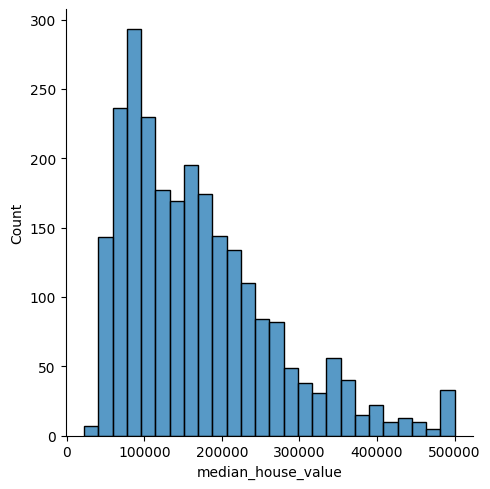

In [12]:
# TODO 2a
# Plot a univariate distribution of observations using seaborn `distplot()` function
sns.displot(df_USAhousing['median_house_value'])

Text(0.5, 0, 'median_house_value')

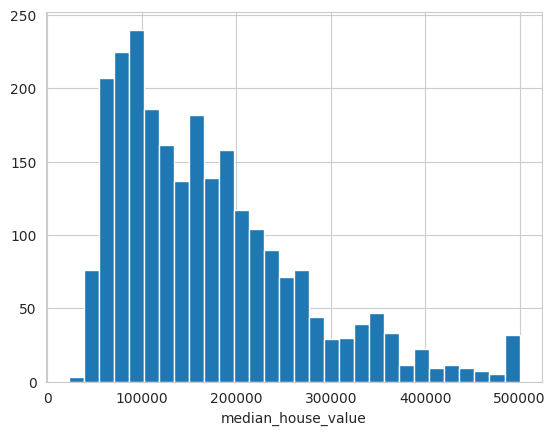

In [13]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')
# Plot a histogram using `hist()` function
df_USAhousing['median_house_value'].hist(bins=30)
plt.xlabel('median_house_value')

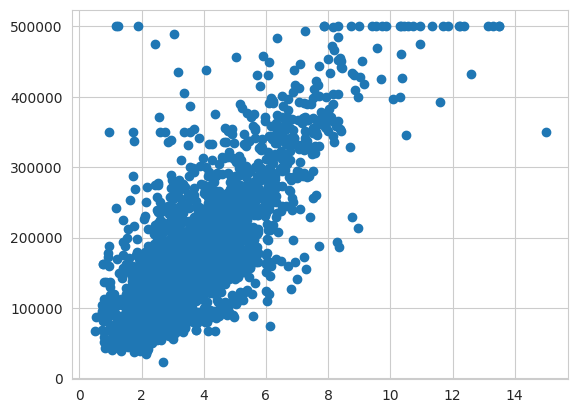

In [14]:
x = df_USAhousing['median_income']
y = df_USAhousing['median_house_value']

# Scatter plot of y vs x using scatter() and `show()` display all open figures
plt.scatter(x, y)
plt.show()

Create a jointplot showing "median_income"  versus "median_house_value".

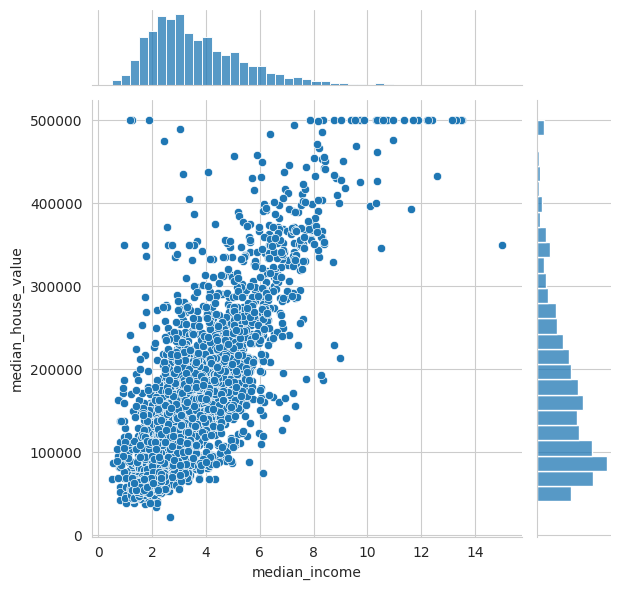

In [15]:
# TODO 2b
# `joinplot()` draws a plot of two variables with bivariate and univariate graphs.
sns.jointplot(x='median_income',y='median_house_value',data=df_USAhousing)

<Axes: xlabel='ocean_proximity', ylabel='count'>

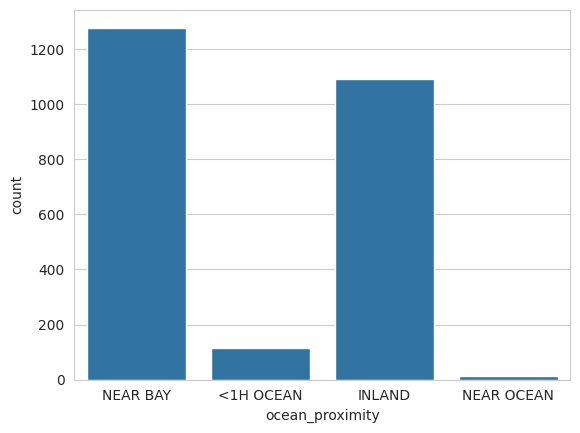

In [16]:
# `countplot()` shows the counts of observations in each categorical bin using bars
sns.countplot(x = 'ocean_proximity', data=df_USAhousing)

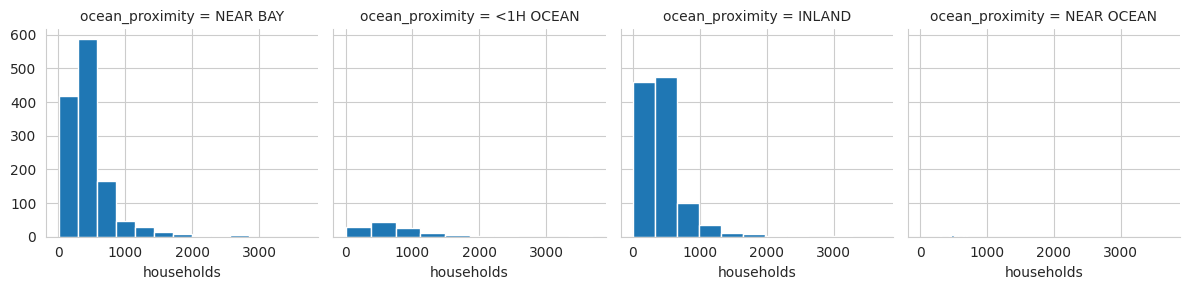

In [17]:
# takes numeric only?
# plt.figure(figsize=(20,20))
# Draw a multi-plot on every facet using `FacetGrid()`
g = sns.FacetGrid(df_USAhousing, col="ocean_proximity")
# Pass a function and the name of one or more columns in the dataframe
g.map(plt.hist, "households");

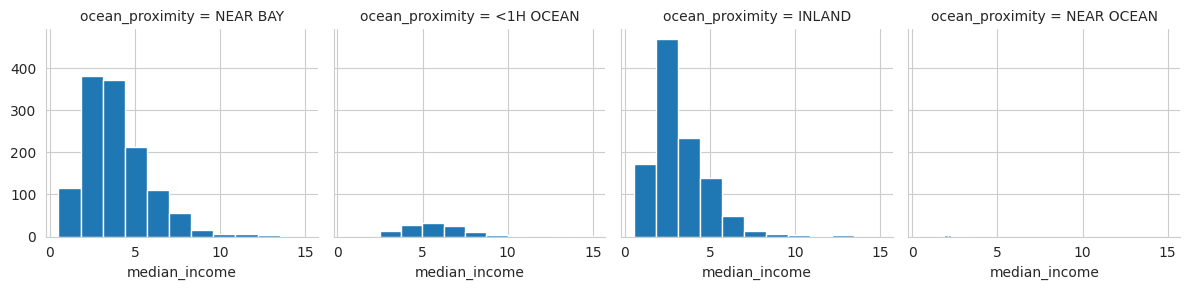

In [17]:
# takes numeric only?
# plt.figure(figsize=(20,20))
# Draw a multi-plot on every facet using `FacetGrid()`
g = sns.FacetGrid(df_USAhousing, col="ocean_proximity")
# Pass a function and the name of one or more columns in the dataframe
g.map(plt.hist, "median_income");

You can see below that this is the state of California!

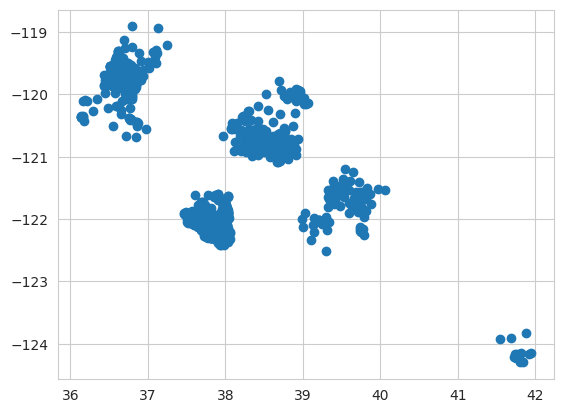

In [49]:
x = df_USAhousing['latitude']
y = df_USAhousing['longitude']

# Scatter plot of y vs x and display all open figures
plt.scatter(x, y)
plt.show()

Copyright 2023 Google Inc.  Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at
http://www.apache.org/licenses/LICENSE-2.0
Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.